## Approximation of Pi

Monte Carlo method can be applied to problems that can be reformulated to have probabilistic interpretation. Very popular example is the approximation of the number Pi.

This example is based on the fact that if you randomly generate points in a square, π/4 of them should lie within an inscribed circle.

Assuming the perimeter of the circle is r, area of the square is equal to 4*r^2 and area of the inscribed circle is π*r^2. Therefore the probability of a point lying inside the inscribed circle is π/4.

In [1]:
# parameters
simulations <- 10000 # number of simulations
perimeter <- 1
 
# randomly generate a point and check if it is in circle
f_point_in_circle <- function(perimeter=1){
  x <- runif(n=1, min=-perimeter, max=perimeter)
  y <- runif(n=1, min=-perimeter, max=perimeter)
  return(list(x=x, 
              y=y,
              in_circle=x^2 + y^2 <= perimeter^2))
}
 
# Monte Carlo simulations
set.seed(123)
pi_df <- data.frame(x=rep(NA, simulations),
                    y=rep(NA, simulations),
                    in_circle=rep(NA, simulations))
for (i in seq(simulations)){
  my_simulation <- f_point_in_circle()
  pi_df$in_circle[i] <- my_simulation$in_circle
  pi_df$x[i] <- my_simulation$x
  pi_df$y[i] <- my_simulation$y
}
 
my_pi <- 4 * sum(pi_df$in_circle) / nrow(pi_df)

In [2]:
# This code generates an approximation of π equal to 3.1416. The more simulations we run, the more accurate it gets.
my_pi

[1] 3.1416

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

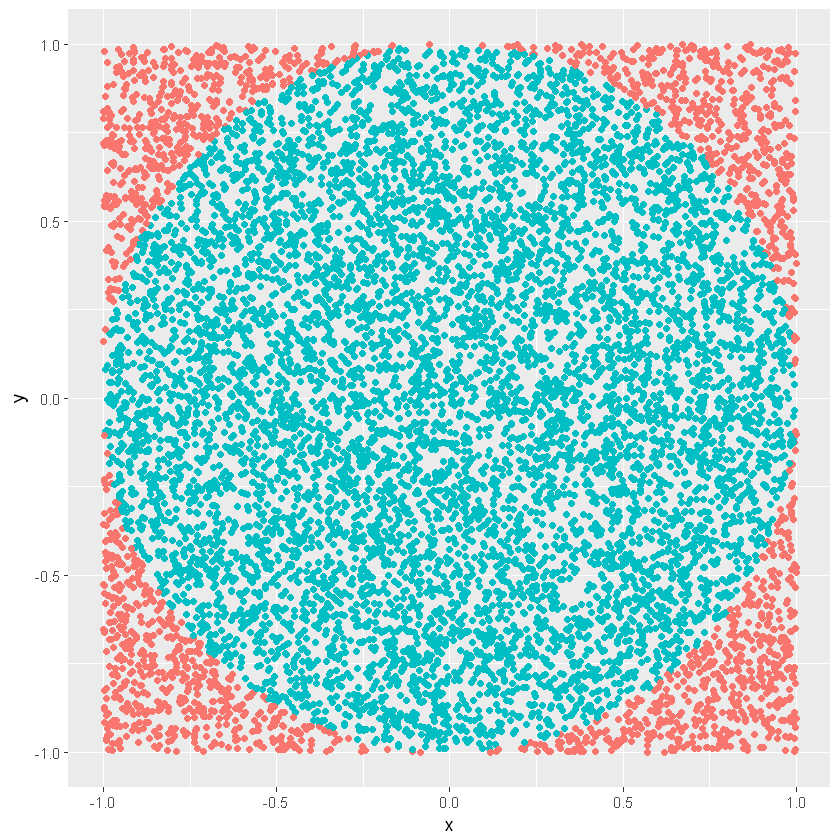

In [3]:
library(ggplot2)
ggplot(pi_df, aes(x=x, y=y, color=as.factor(in_circle))) +
      geom_point() +
      theme(legend.position='none')

## Worst-case scenario for future stock price

Assume we want to calculate the worst-case scenario of a future stock price. This problem called value at risk is heavily used in risk management. By “worst-case scenario” we mean the value that the stock price will exceed with 99% probability (i.e., there is only 1% probability that the stock price will be below). The current price of our stock is 100 $. We want to see the possible future prices after 20 trading days.

As stated above, we need to make some assumptions about the future stock price. So let’s say that the drift over the 20 trading days is 10% (i.e. in average the price will go up to 110) and the volatility is 20%.

Second step is to generate some random inputs, which in our case means to model the future price given the current price, drift and the volatility. For our purpose we do not need anything fancy so we will use the standard stock price model called Geometric Brownian Motion:

St+1 = St * (1 + μΔt + σε√Δt)

Where St is price in time t, μ is our drift, Δt means one period (in our case 1 trading day, i.e. one twentieth of the period), σ is our volatility and ε is a random number between 0 and 1. The core idea of Monte Carlo method is to generate the future price (which is random) high number of times to simulate what are all the situations that can occur.

In the third step we calculate the stock price at the end of 20th day given the model for all the randomly generated daily returns. This step (and also the previous ones) is demonstrated by the following code.

In [4]:
#' Stock price calculation
#' 
#' Calculates stock price after n periods using standard stock price model
#' @param stock_price original stock price
#' @param n number of periods
#' @param stock_mu expected percentual stock drift over n periods
#' @param stock_sigma expecter percentual stock volatility
#' @return stock price after n periods
f_stock_return <- function(stock_price, n, stock_mu, stock_sigma){
  delta_t <- 1/n # one period
  for (i in seq(n)){
    epsilon <- runif(n=1, min=0, max=1) # random generated number
    # calculate stock price (using quantile function of normal distribution)
    stock_price <- stock_price * (1 + qnorm(epsilon, 
                                            stock_mu * delta_t, 
                                            stock_sigma* sqrt(delta_t)))
  }
  return(stock_price)
}

In [5]:
# parameters
simulations <- 10000 # number of MC simulations
n <- 20 # trading days
stock_price <- 100
stock_mu <- .1 # drift 10%
stock_sigma <- .2 # volatility 20%
 
# Monte Carlo simulations
set.seed(42) # for reproducibility
stock_prices <- c()
for (i in seq(simulations)){
  stock_prices <- c(stock_prices,
                    f_stock_return(stock_price=stock_price, 
                                   n=n, 
                                   stock_mu=stock_mu, 
                                   stock_sigma=stock_sigma))
}

In [6]:
quantile(stock_prices, c(.01, .05))

1%       5% 
67.46501 77.69902

In 99% scenarios the price will be higher than 67 in 20 trading days, 95% of them will be higher than 77, which gives us needful assessment of how bad our investment could go.